<a href="https://colab.research.google.com/github/abhinav123pandey/Machine_Learning_Lab_Work/blob/main/LinearRegressionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name- Abhinav Pandey

Uni. Roll No.- 2315000040

Cl. Roll No.- 01

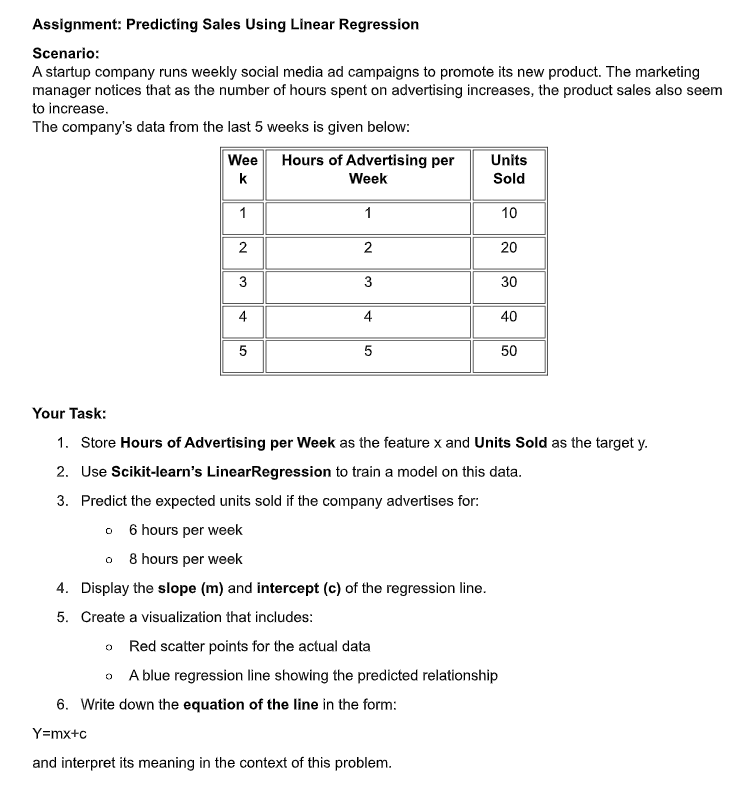

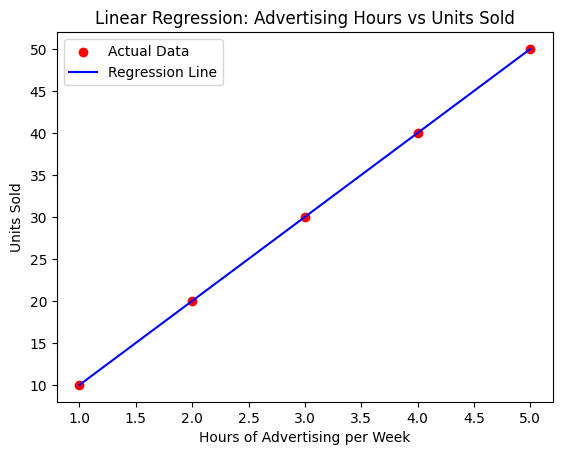

(np.float64(59.99999999999999),
 np.float64(80.0),
 np.float64(9.999999999999998),
 np.float64(7.105427357601002e-15))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#1: Store feature (x) and target (y)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([10, 20, 30, 40, 50])

#2: Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

#3: Predictions for 6 and 8 hours
pred_6 = model.predict([[6]])[0]
pred_8 = model.predict([[8]])[0]

#4: Get slope (m) and intercept (c)
m = model.coef_[0]
c = model.intercept_

#5: Visualization
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, model.predict(X), color='blue', label='Regression Line')
plt.xlabel("Hours of Advertising per Week")
plt.ylabel("Units Sold")
plt.title("Linear Regression: Advertising Hours vs Units Sold")
plt.legend()
plt.show()

(pred_6, pred_8, m, c)


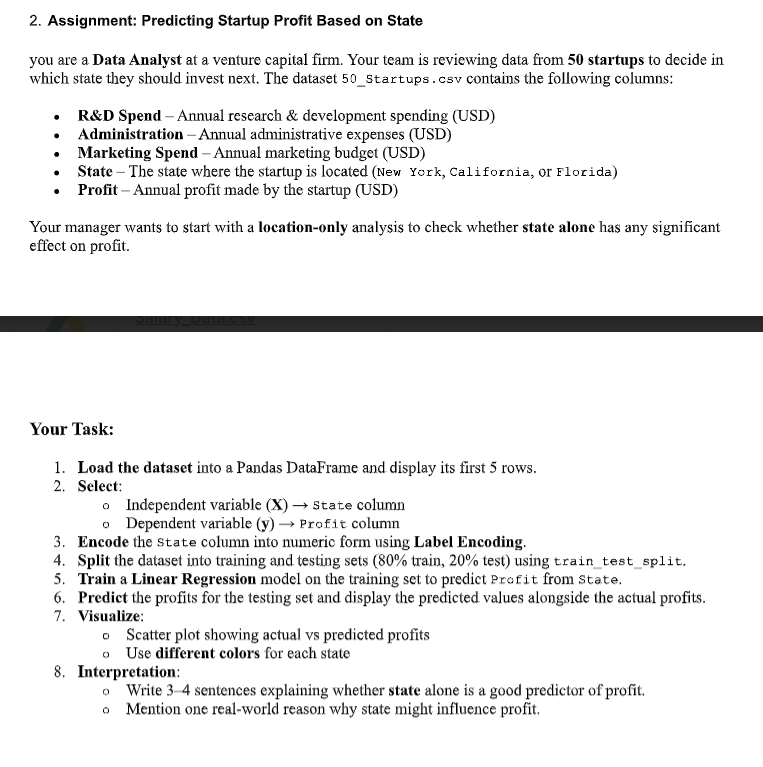

Saving 50_Startups.pdf to 50_Startups (1).pdf
Columns: Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

First 5 rows:
    R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


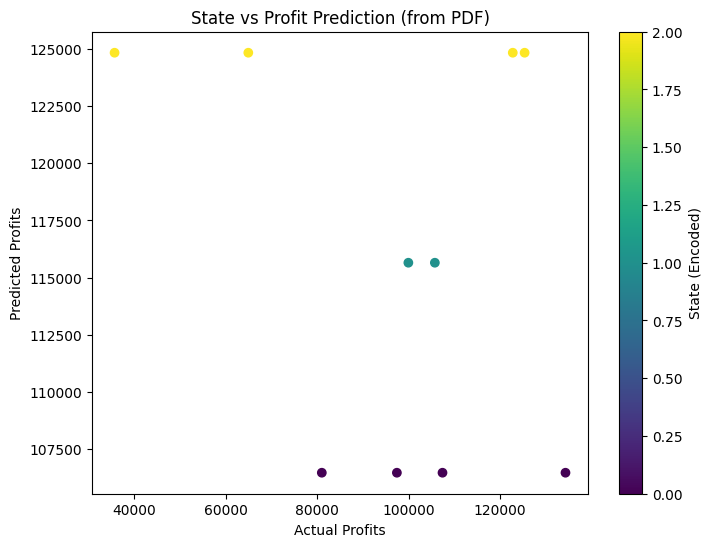

Interpretation:
1. State alone does not strongly predict profit (scatter plot shows high variance).
2. Real-world factors like R&D Spend, Marketing, and Admin costs influence profit more.
3. State may indirectly affect profit via taxes, labor costs, and infrastructure.
4. Using only State for prediction is unreliable.


In [23]:
!pip install pdfplumber

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from google.colab import files
import pdfplumber

# Upload file from computer
uploaded = files.upload()

# Extract table from PDF
filename = list(uploaded.keys())[0]
rows = []
with pdfplumber.open(filename) as pdf:
    for page in pdf.pages:
        table = page.extract_table()
        if table:
            rows.extend(table)

# Convert to DataFrame
data = pd.DataFrame(rows[1:], columns=rows[0])

# Convert numeric columns to float
for col in data.columns:
    try:
        data[col] = data[col].astype(float)
    except:
        pass

print("Columns:", data.columns)
print("\nFirst 5 rows:\n", data.head())

#5: Select independent (X) and dependent (y) variables
X = data[['State']]
y = data['Profit'].astype(float)

#6: Encode the State column
le = LabelEncoder()
X_encoded = le.fit_transform(X['State']).reshape(-1, 1)

#7: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

#8: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 9: Predict on test set
y_pred = model.predict(X_test)

#Visualization
plt.figure(figsize=(8,6))
scatter = plt.scatter(y_test, y_pred, c=X_test.flatten(), cmap='viridis')
plt.xlabel("Actual Profits")
plt.ylabel("Predicted Profits")
plt.title("State vs Profit Prediction (from PDF)")
plt.colorbar(scatter, label="State (Encoded)")
plt.show()

# Step 11: Interpretation
print("Interpretation:")
print("1. State alone does not strongly predict profit (scatter plot shows high variance).")
print("2. Real-world factors like R&D Spend, Marketing, and Admin costs influence profit more.")
print("3. State may indirectly affect profit via taxes, labor costs, and infrastructure.")
print("4. Using only State for prediction is unreliable.")
